# Neuraal netwerk oefening: Nintendo games

In deze opgave gaan we een aantal eenvoudige neurale netwerken maken om de basisfunctionaliteit in te oefenen van Tensorflow en Keras. Hierbij focussen we vooral op de processing stappen, het opstellen van de architectuur en de trainingsstap.
Het is hierbij niet noodzakelijk om op zoek te gaan naar de beste architectuur.
Gebruik de tensorflow library voor alle stappen na het inladen van de dataset.

**Dien de opgave in door het te pushen naar de main branch op github en vergeet niet op de vragen te beantwoorden. Laat je output staan om eenvoudiger je resultaten te kunnen verifieren. Vergeet ook de vragen niet te beantwoorden**

Bij de evaluatie van deze oefening wordt de volgende puntenverdeling behaald:
*   Code correctheid en volledigheid: 50%
*   Code kwaliteit: 20 %
*   Antwoorden vragen: 30%

## Downloaden en inladen data

Schrijf in onderstaande cell alle uit te voeren imports die nodig zijn doorheen deze notebook.

In [1]:
# Schrijf alle imports in deze blok
import tensorflow as tf
import opendatasets as od
import pandas as pd
import matplotlib.pyplot as plt

In deze opgave maken we gebruik van een dataset over Nintendo games.
We gaan deze dataset gebruiken om de gebrukersscore te voorspellen die een bepaald spel gaat behalen.

Maak gebruik van de tensorflow get_file om de volgende file te downloaden:
* https://www.kaggle.com/datasets/joebeachcapital/nintendo-games

Dit is een dataset van kaggle dus gebruik de opendatasets library zoals gezien in data science

In [3]:
# downloaden datasets
od.download('https://www.kaggle.com/datasets/joebeachcapital/nintendo-games')

Skipping, found downloaded files in ".\nintendo-games" (use force=True to force download)


Lees deze datasets in (met behulp van panda) en als dataframe.
Print de eerste 5 rijen uit.

**Welke kolommen zijn in deze dataset de features en welke de targets/labels? Welke kolommen zou je niet gebruiken en waarom?**
Maak lijsten aan voor de namen van de feature-kolommen en label kolom.

Antwoord: ...

In [2]:
df = pd.read_csv("./nintendo-games/NintendoGames.csv")

display(df.head())

label = ['user_score']
features = ['platform', 'meta_score', 'esrb_rating', 'developers', 'genres']

,meta_score,title,platform,date,user_score,link,esrb_rating,developers,genres
0,NaN,Super Mario RPG,Switch,"Nov 17, 2023",NaN,/game/switch/super-mario-rpg,E,['Nintendo'],"['Role-Playing', 'Japanese-Style']"
1,NaN,WarioWare: Move It!,Switch,"Nov 3, 2023",NaN,/game/switch/warioware-move-it!,RP,['Intelligent Systems'],"['Miscellaneous', 'Party / Minigame']"
2,NaN,Super Mario Bros. Wonder,Switch,"Oct 20, 2023",NaN,/game/switch/super-mario-bros-wonder,E,['Nintendo'],"['Action', 'Platformer', '2D']"
3,NaN,Detective Pikachu Returns,Switch,"Oct 6, 2023",NaN,/game/switch/detective-pikachu-returns,NaN,['Creatures Inc.'],"['Adventure', '3D', 'Third-Person']"
4,NaN,Fae Farm,Switch,"Sep 8, 2023",NaN,/game/switch/fae-farm,E10+,['Phoenix Labs'],"['Simulation', 'Virtual', 'Virtual Life']"


## Exploratory Data Analysis

Bereken voor de dataset de volgende statistieken met behulp van pandas:
* Hoeveel platformen zijn er aanwezig in de dataset
* Hoeveel games hebben geen user-score? Drop deze rijen ook.
* Maak een figuur om te tonen hoeveel games er ontwikkeld zijn voor elk platform.
* Hoeveel null waarden zijn er per kolom? Vul de numerieke kolommen aan met 0 en de categorieke kolommen met 'unknown'.
* Is de genres en developer kolom een string of een lijst? Zijn ze beide hetzelfde type? Hoe heb je dit gecontroleerd? Pas de kolommen met de apply-functie aan zodat beide kolommen een tekstveld zijn gesplitst door het ',' symbool.
* Hoeveel unieke developers zijn er die nintendo games maken? Wat zijn de 5 developers die aan het meeste games gewerkt hebben? Maak hiervoor een figuur.


**Antwoord vraag 5:**

In [3]:
# Vraag 1
df.platform.nunique()

10

In [4]:
# Vraag 2
print(df.user_score.isna().sum())
print(len(df))
df = df[~df.user_score.isna()]
print(len(df))

238
1094
856


<AxesSubplot:>

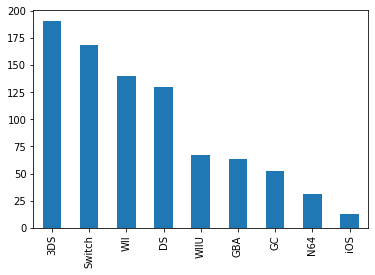

In [5]:
# Vraag 3
df.platform.value_counts().plot.bar()

In [6]:
# Vraag 4
display(df.isna().sum())
df.meta_score.fillna(0, inplace=True)
df.esrb_rating.fillna('unknown', inplace=True)

display(df.isna().sum())

meta_score     166
title            0
platform         0
date             0
user_score       0
link             0
esrb_rating     63
developers       0
genres           0
dtype: int64

meta_score     0
title          0
platform       0
date           0
user_score     0
link           0
esrb_rating    0
developers     0
genres         0
dtype: int64

In [7]:
# Vraag 5
df.developers = df.developers.apply(lambda x: x[1:-1].replace("'", '').replace("  ", ""))
df.genres = df.genres.apply(lambda x: x[1:-1].replace("'", '').replace(", ", ","))

In [8]:
# Vraag 6
df.developers.str.split(',').explode().value_counts()


Nintendo                  342
Game Freak                 46
Intelligent Systems        45
HAL Labs                   42
Level 5                    30
                         ... 
First Studio                1
Tarsier Studios             1
Paladin Studios             1
Valhalla Game Studios       1
Paradigm Entertainment      1
Name: developers, Length: 151, dtype: int64

## Preprocessing

Voer nu de volgende stappen uit om de beschikbare data zo bruikbaar mogeljk te maken. Voor deze sectie vind je [hier](https://www.tensorflow.org/tutorials/load_data/pandas_dataframe) heel wat extra informatie om dit zo duidelijk mogelijk te maken.
* Splits de dataset in training en testdata. Gebruik 10% van de data als testdata. Tip: bekijk de sample functie in pandas
* Maak met de from_tensor_slices functie een tf.data.Dataset van het beschikbare dataframe. Zorg er hierbij voor dat de volgende features gebruikt worden: platform, meta_score, esrb_rating, developers, genres. Natuurlijk moet het target ook meegegeven worden bij het aanmaken van de dataset. Zorg er hierbij voor dat alle elementen geshuffeld worden, maak daarna batches van 4 elementen.
* Maak nu lijsten aan waarbij je de kolommen verdeeld in de volgende types: numeriek, categoriek, text, .... Maak op basis van deze lijsten de nodige inputs (tf.keras.Inputs) aan.
* Maak nu de nodige preprocessing stappen aan voor de types data:
    * numeriek -> normalisatie
    * categoriek -> one-hot encoding
    * tekst -> multi-hot encoding
* Maak een model van de preprocessing stappen. Maak ook een figuur van het model.

**Vraag: Je hebt hiervoor het aantal unieke developers berekend. Kan je uit de figuur afleiden of dit aantal klopt? Hoe doe je dit? Verwijs hierbij naar de gemaakte figuur.**

**Antwoord:**

In [13]:
# stap 1

df_train=df.sample(frac=0.8,random_state=200)
df_test=df.drop(df_train.index)

import numpy as np
def df_to_dataset(dataframe, target, shuffle=True, batch_size=32):
  df = dataframe[['meta_score','platform', 'esrb_rating','developers', 'genres', target ]].copy()
  labels = df.pop(target)
  
  print(dict(df))
  print(labels)
  ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(batch_size)
  return ds

train = df_to_dataset(df_train, 'user_score', shuffle=True, batch_size=4)
test = df_to_dataset(df_test, 'user_score', shuffle=True, batch_size=4)

{'meta_score': 462    80.0
394     0.0
849    58.0
291    64.0
493    75.0
       ... 
107    64.0
866    96.0
885    87.0
489    84.0
745    63.0
Name: meta_score, Length: 685, dtype: float64, 'platform': 462      WIIU
394       3DS
849       WII
291       3DS
493       3DS
        ...  
107    Switch
866        GC
885        DS
489      WIIU
745       WII
Name: platform, Length: 685, dtype: object, 'esrb_rating': 462       E10+
394          E
849          E
291          T
493          E
        ...   
107    unknown
866          T
885       E10+
489          E
745          E
Name: esrb_rating, Length: 685, dtype: object, 'developers': 462                     TT Games
394                     Nintendo
849                     Nintendo
291    Next Level Games,Nintendo
493          Intelligent Systems
                 ...            
107                     Nintendo
866                     Nintendo
885                         iNiS
489                     Nintendo
745                     N

In [235]:
# stap 3
numeric_features_names = ['meta_score']
categorical_feature_names = ['platform', 'esrb_rating']
text_feature_names = ['developers', 'genres']

inputs = {}
for name, column in df.items():
  
  if name in categorical_feature_names or name in text_feature_names :
    inputs[name] = tf.keras.Input(shape=(), name=name, dtype=tf.string)
  elif name in numeric_features_names:
    inputs[name] = tf.keras.Input(shape=(), name=name, dtype=tf.float32)

inputs

{'meta_score': <KerasTensor: shape=(None,) dtype=float32 (created by layer 'meta_score')>,
 'platform': <KerasTensor: shape=(None,) dtype=string (created by layer 'platform')>,
 'esrb_rating': <KerasTensor: shape=(None,) dtype=string (created by layer 'esrb_rating')>,
 'developers': <KerasTensor: shape=(None,) dtype=string (created by layer 'developers')>,
 'genres': <KerasTensor: shape=(None,) dtype=string (created by layer 'genres')>}

In [244]:
# Vraag 4
def stack_dict(inputs, dtype=tf.float32, fun=tf.stack):
  values = []
  for key in sorted(inputs.keys()):
    values.append(tf.cast(inputs[key], dtype))

  return fun(values, axis=-1)

preprocessed = []

# numeriek
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(stack_dict(dict(df_train[numeric_features_names])))

numeric_inputs = {}
for name in numeric_features_names:
  numeric_inputs[name]=inputs[name]

numeric_inputs = stack_dict(numeric_inputs)
numeric_normalized = normalizer(numeric_inputs)

preprocessed.append(numeric_normalized)

# categoriek
for name in categorical_feature_names:

  if inputs[name].dtype is tf.string:
    lookup = tf.keras.layers.StringLookup(output_mode='one_hot')
  else:
    lookup = tf.keras.layers.IntegerLookup(output_mode='one_hot')
  lookup.adapt(stack_dict(dict(df_train[name]), dtype=tf.string))

  x = inputs[name][:, tf.newaxis]
  x = lookup(x)
  preprocessed.append(x)

  
# tekst
for name in text_feature_names:

  vectorization = tf.keras.layers.TextVectorization(output_mode='multi_hot', standardize=None, split=lambda x: tf.strings.split(x, sep=","))
  vectorization.adapt(stack_dict(dict(df_train[name]), dtype=tf.string))

  x = inputs[name]
  x = vectorization(x)
  preprocessed.append(x)

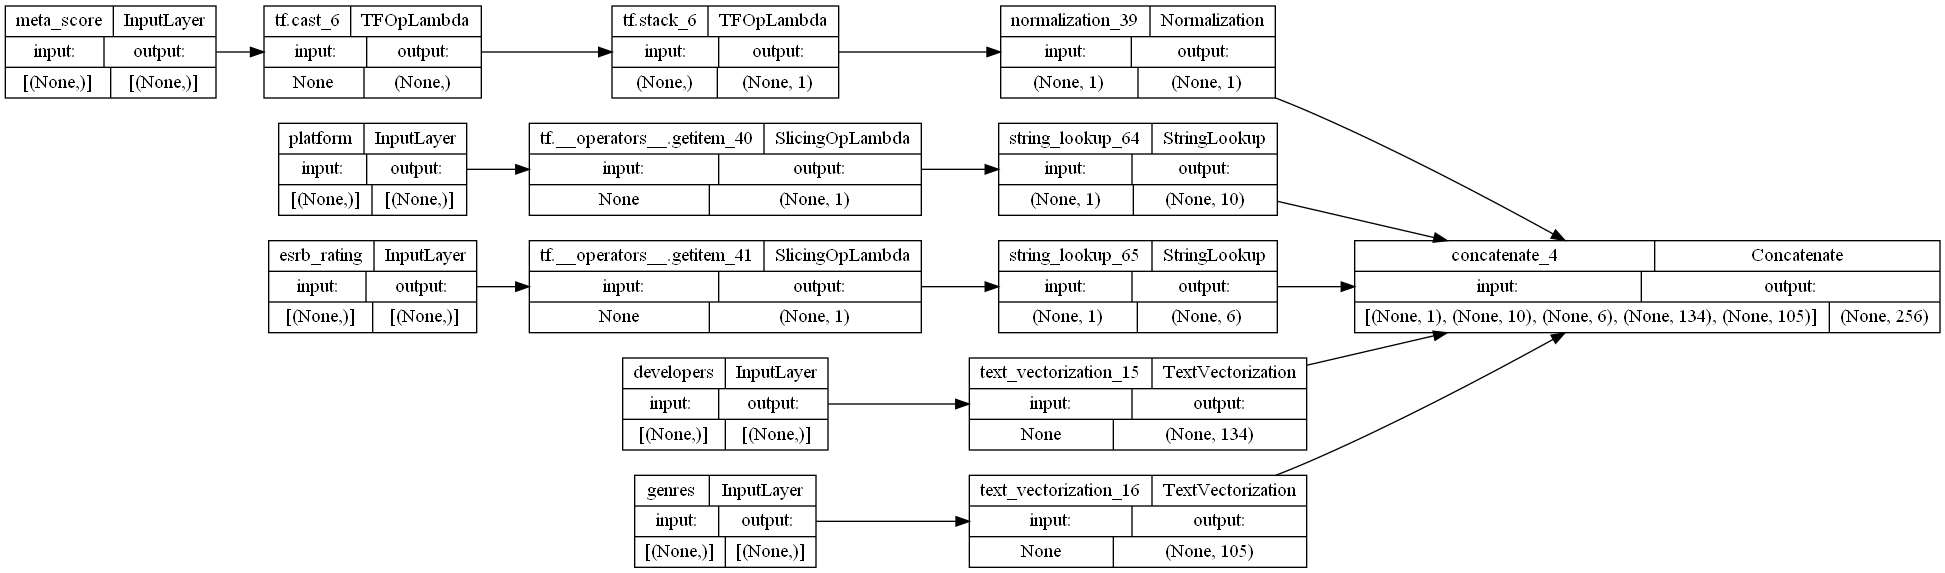

In [245]:
# Vraag 5
preprocesssed_result = tf.keras.layers.concatenate(preprocessed)
preprocessor = tf.keras.Model(inputs, preprocesssed_result)
tf.keras.utils.plot_model(preprocessor, rankdir="LR", show_shapes=True)

## Modelling

Maak nu met behulp van **Tensorflow** de volgende modellen aan, train ze en evalueer ze aan de hand van de trainingsdata:
* Lineaire regressie
* Neuraal netwerk bestaande uit 1 hidden laag met 3 neuronen
* Neuraal netwerk bestaande uit 3 hidden lagen met respectievelijk 10, 5 en 5 neuronen.
* Neuraal netwerk bestaande uit 3 hidden lagen met respectievelijk 10, 5 en 5 neuronen met dropout.
* Neuraal netwerk bestaande uit 3 hidden lagen met respectievelijk 10, 5 en 5 neuronen met L1 regularisatie.
* Neuraal netwerk bestaande uit 3 hidden lagen met respectievelijk 10, 5 en 5 neuronen met L2 regularisatie.

Maak zoveel mogelijk gebruik van functies om repititieve zaken te verbergen.
Maak daarnaast ook gebruik van de **plot_loss** functie om de geschiedenis van het trainen te visualiseren.

**Bespreek hieronder je observaties. Welke loss functie heb je gebruikt? Waarom heb je voor deze functie gekozen? Welke hyperparameters heb je uitgeprobeerd? Welk model werkt goed, welk niet? Welk is aan het overfitten, welk aan het underfitten? Bespreek de gebruikte parameters van de verschillende lagen van het laatste model. Waarom heb je de waarde gekozen voor die parameters?
Verwijs hierbij naar de figuren en de behaalde loss-waarden voor de testdata.**

Antwoord ...

In [251]:
# functie voor plotten van de history
def plot_loss(history):
    plt.plot(history.history['loss'], label='mae')
    plt.plot(history.history['mse'], label='mse')
    #plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)

In [252]:
# functies voor trainen en evalueren
def train_eval_model(model, train, test, epochs=100):
    history = model.fit(
        train,
        epochs=epochs,
        #validation_data=test,
        verbose=0   # Suppress logging.
        )
    
    plot_loss(history)
    
    print("Loss of test data", model.evaluate(test, verbose=0))

Loss of test data [0.7585831880569458, 0.9959424734115601]


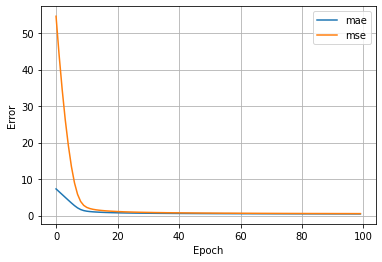

In [253]:
x = preprocessor(inputs)
x = tf.keras.layers.Dense(units=1)(x)
model = tf.keras.Model(inputs, x)

model.compile(optimizer='adam',
                loss=tf.keras.losses.MeanAbsoluteError(),
                metrics=['mse'])

train_eval_model(model, train, test)

Loss of test data [0.7171804904937744, 0.9294177293777466]


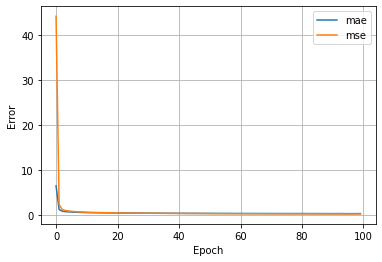

In [256]:
# 3 hidden lagen met respectievelijk 10, 5 en 5 neuronen.
x = preprocessor(inputs)
body = tf.keras.Sequential([
    tf.keras.layers.Dense(units=10, activation='relu'),
    tf.keras.layers.Dense(units=5, activation='relu'),
    tf.keras.layers.Dense(units=5, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

x = body(x)
model = tf.keras.Model(inputs, x)

model.compile(optimizer='adam',
                loss=tf.keras.losses.MeanAbsoluteError(),
                metrics=['mse'])

train_eval_model(model, train, test)

Loss of test data 47904.7578125


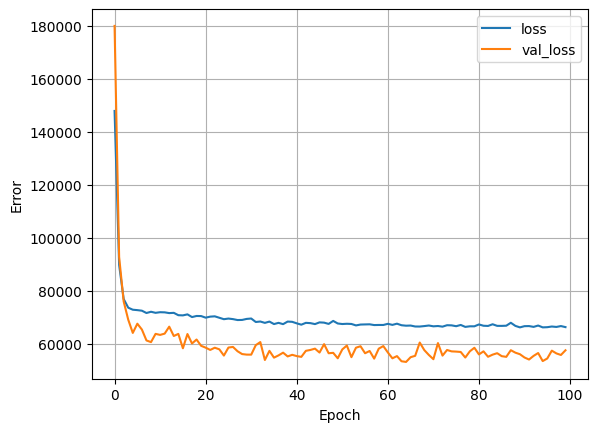

In [14]:
# 3 hidden lagen met respectievelijk 10, 5 en 5 neuronen met dropout.
x = preprocessor(inputs)
body = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=10, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=5, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=5, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=1)
])

x = body(x)
model = tf.keras.Model(inputs, x)

model.compile(optimizer='adam',
                loss=tf.keras.losses.MeanAbsoluteError(),
                metrics=['mse'])

train_eval_model(model, train, test)

Loss of test data 44395.8359375


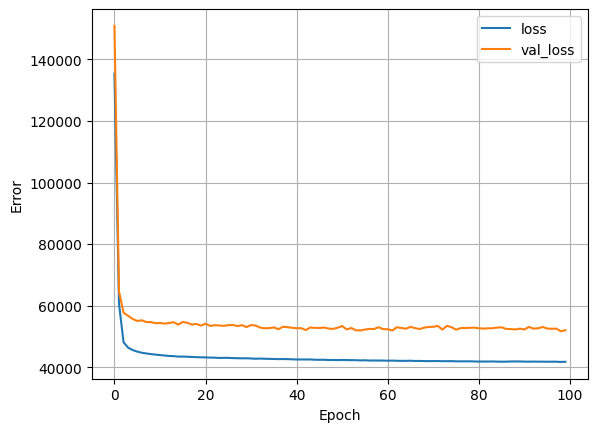

In [15]:
# 3 hidden lagen met respectievelijk 10, 5 en 5 neuronen met l1 regularisatie.
x = preprocessor(inputs)
body = tf.keras.Sequential([
    tf.keras.layers.Dense(units=10, activation='relu', kernel_regularizer='l1'),
    tf.keras.layers.Dense(units=5, activation='relu', kernel_regularizer='l1'),
    tf.keras.layers.Dense(units=5, activation='relu', kernel_regularizer='l1'),
    tf.keras.layers.Dense(units=1)
])

x = body(x)
model = tf.keras.Model(inputs, x)

model.compile(optimizer='adam',
                loss=tf.keras.losses.MeanAbsoluteError(),
                metrics=['mse'])

train_eval_model(model, train, test)

Loss of test data 44398.49609375


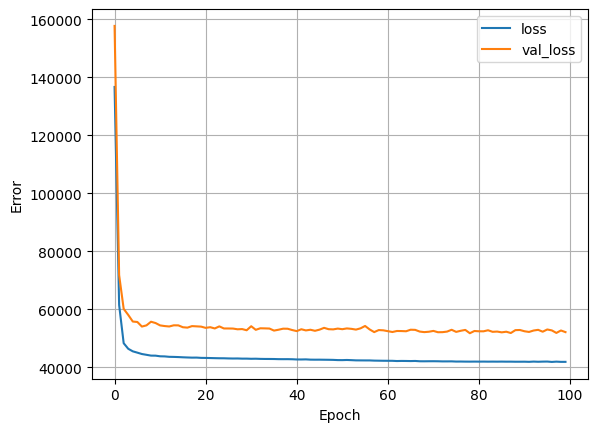

In [16]:
# 3 hidden lagen met respectievelijk 10, 5 en 5 neuronen met l2 regularisatie.
x = preprocessor(inputs)
body = tf.keras.Sequential([
    tf.keras.layers.Dense(units=10, activation='relu', kernel_regularizer='l2'),
    tf.keras.layers.Dense(units=5, activation='relu', kernel_regularizer='l2'),
    tf.keras.layers.Dense(units=5, activation='relu', kernel_regularizer='l2'),
    tf.keras.layers.Dense(units=1)
])

x = body(x)
model = tf.keras.Model(inputs, x)

model.compile(optimizer='adam',
                loss=tf.keras.losses.MeanAbsoluteError(),
                metrics=['mse'])

train_eval_model(model, train, test)